# Лабораторная работа № 1
## Численное дифференцирование и интегрирование


### Постановка задачи:
Реализовать методы нахождения производной и численного интегрирования, проанализировать зависимость численных отклонений от величины шага.

### Цели работы:
Изучить методы нахождения производной и численного интегрирования

## 1. Реализуйте методы нахождения производной при фиксированном значении шага.

### Методы вычисления производной:
Пусть функция f(x) задана на отрезке [a, b]. Фиксированный шаг сетки - h, количество узлов сетки $n=\frac{b-a}{h}$. Координаты узлов сетки $x_i=a+hi, i=0,...,n$. От выбора расположения узла сетки относительно точки зависит метод вычисления производной в этой точке, тогда порядок точности методы - степень, с которой h входит в оценку погрешностей вычисления.

1.   Правая разностная производная
$$
f'(x) = \frac{f(x+h)-f(x)}{h}
$$
2.   Левая разностная производная
$$
f'(x) = \frac{f(x)-f(x-h)}{h}
$$
3.   Центральная разностная производная
$$
y'_i = \frac{y_{i+1}-y_{i-1}}{2h}
$$
$$
y'_1 = \frac{-3y_0+4y_1-y_2}{2h}
$$
$$
y'_n = \frac{y_{n-2}-4y_{n-1}+3y_n}{2h}
$$
Все методы, кроме последнего, имеют первый порядок точности. Центральная разностная производная имеет второй порядок, т. к. значение производной вычисляется уже с использованием трёх узлов, вместо двух



Реализуем методы нахождения производной при фиксированном значении

In [1]:
def right_difference_derivative(func, h, x):
  return 1.0 * (func(x + h) - func(x)) / h

def left_difference_derivative(func, h, x):
  return 1.0 * (func(x) - func(x - h)) / h

def central_difference_derivative(func, h, x):
  return 1.0 * (func(x + h) - func(x - h)) / (2*h)

## 2. Возьмите 2 произвольные функции. Вычислите аналитически производные этих функций. Постройте их графики, а также вычисленные значения чис- ленной производной в узлах сетки.

Возьмём 2 произвольные функции:
$$
f_1(x) = sin(x)
$$
$$
f_2(x) = x^3 + 5x^2 - 12x + 42
$$
Аналитически вычисленные производные равны:
$$
f'_1(x) = cos(x)
$$
$$
f'_2(x) = 3x^2 + 10x - 12
$$
Построим графики этих производных:

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

func_1 = lambda x: np.sin(x)
func_2 = lambda x: x * x * x + 5 * x * x - 12 * x + 42

derivative_func_1 = lambda x: np.cos(x)
derivative_func_2 = lambda x: 3 * x * x + 10 * x - 12
x = np.linspace(-10, 10, 100)
x_points = np.arange(-10, 10, 1)

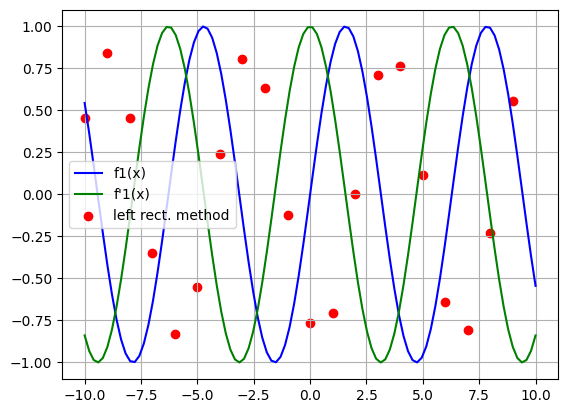

In [3]:
left_diff_f1 = np.fromfunction(lambda x_points: left_difference_derivative(func_1, 20 / 10, x_points), (20,), dtype=float)

fig, ax1 = plt.subplots()
ax1.plot(x, func_1(x), 'b', label="f1(x)")
ax1.plot(x, derivative_func_1(x), 'g', label="f'1(x)")

ax1.scatter(x_points, left_diff_f1, c='r', label="left rect. method")

ax1.legend()
ax1.grid()
plt.show()

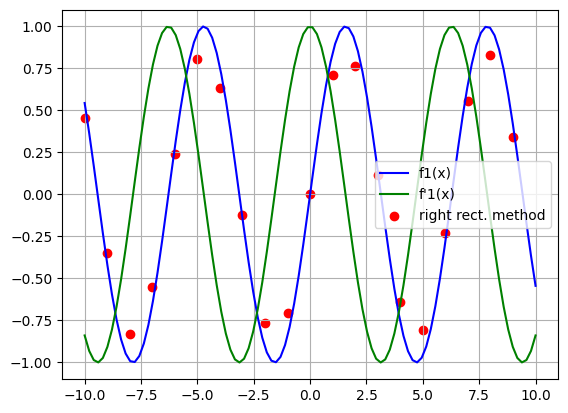

In [4]:
right_diff_f1 = np.fromfunction(lambda x_points: right_difference_derivative(func_1, 20 / 10, x_points), (20,), dtype=float)

fig, ax2 = plt.subplots()
ax2.plot(x, func_1(x), 'b', label="f1(x)")
ax2.plot(x, derivative_func_1(x), 'g', label="f'1(x)")

ax2.scatter(x_points, right_diff_f1, c='r', label="right rect. method")

ax2.legend()
ax2.grid()
plt.show()

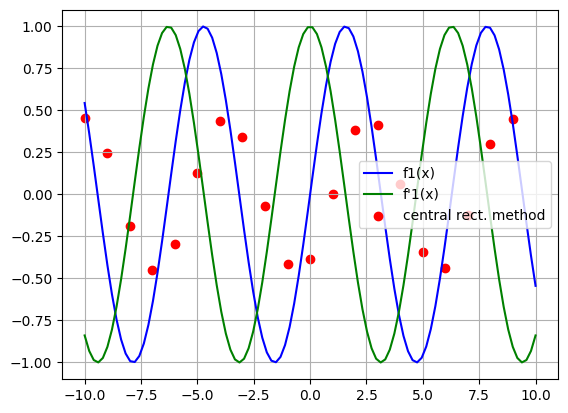

In [5]:
central_diff_f1 = np.fromfunction(lambda x_points: central_difference_derivative(func_1, 20 / 10, x_points), (20,), dtype=float)

fig, ax3 = plt.subplots()
ax3.plot(x, func_1(x), 'b', label="f1(x)")
ax3.plot(x, derivative_func_1(x), 'g', label="f'1(x)")

ax3.scatter(x_points, central_diff_f1, c='r', label="central rect. method")

ax3.legend()
ax3.grid()
plt.show()

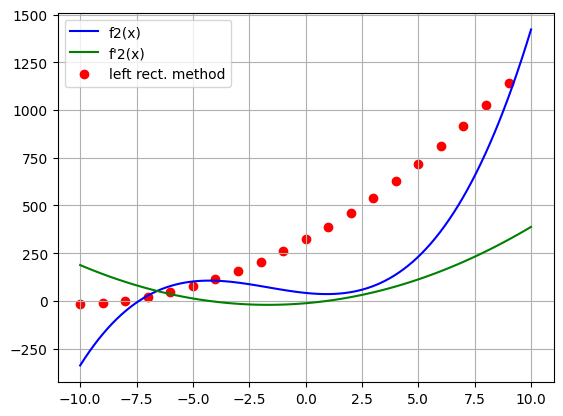

In [6]:
left_diff_f2 = np.fromfunction(lambda x_points: left_difference_derivative(func_2, 20 / 10, x_points), (20,), dtype=float)

fig, ax1 = plt.subplots()
ax1.plot(x, func_2(x), 'b', label="f2(x)")
ax1.plot(x, derivative_func_2(x), 'g', label="f'2(x)")

ax1.scatter(x_points, left_diff_f2, c='r', label="left rect. method")

ax1.legend()
ax1.grid()
plt.show()

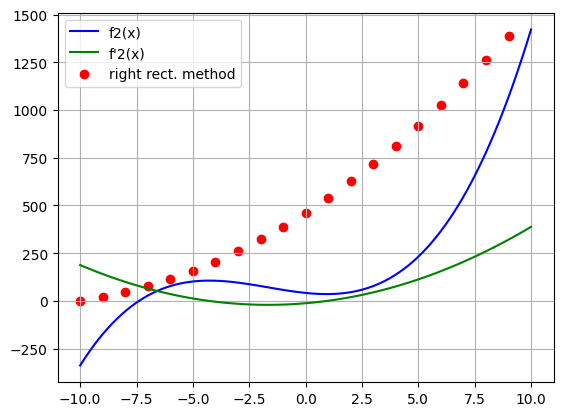

In [7]:
right_diff_f2 = np.fromfunction(lambda x_points: right_difference_derivative(func_2, 20 / 10, x_points), (20,), dtype=float)

fig, ax1 = plt.subplots()
ax1.plot(x, func_2(x), 'b', label="f2(x)")
ax1.plot(x, derivative_func_2(x), 'g', label="f'2(x)")

ax1.scatter(x_points, right_diff_f2, c='r', label="right rect. method")

ax1.legend()
ax1.grid()
plt.show()

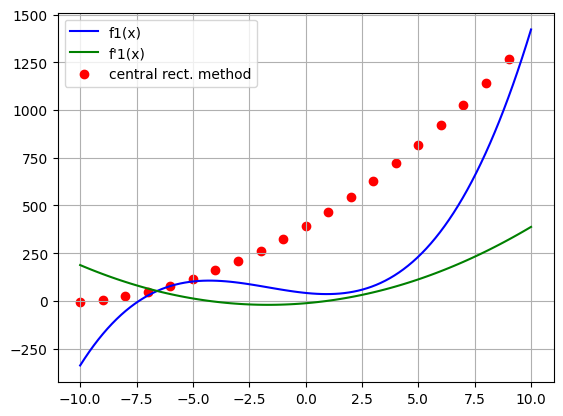

In [8]:
central_diff_f2 = np.fromfunction(lambda x_points: central_difference_derivative(func_2, 20 / 10, x_points), (20,), dtype=float)

fig, ax1 = plt.subplots()
ax1.plot(x, func_2(x), 'b', label="f1(x)")
ax1.plot(x, derivative_func_2(x), 'g', label="f'1(x)")

ax1.scatter(x_points, central_diff_f2, c='r', label="central rect. method")

ax1.legend()
ax1.grid()
plt.show()

## 3,4 Найдите среднеквадратичные отклонения численных от истинных значений производной. Выполните предыдущий пункт при уменьшении шага (увеличения количества узлов) в 2, 4, 8 и 16. Как изменяется среднеквадратичное отклонение при изменении шага? Постройте график зависимости среднеквадратичного отклонения от величины шага.

Расчитаем среднеквадратичные отклонения для 1 функции 

In [9]:
#Левая разностная производная
left_diff_f1_h2 = np.fromfunction(lambda x_points: left_difference_derivative(func_1, 20 / 10 / 2, x_points), (20,), dtype=float)
left_diff_f1_h4 = np.fromfunction(lambda x_points: left_difference_derivative(func_1, 20 / 10 / 4, x_points), (20,), dtype=float)
left_diff_f1_h8 = np.fromfunction(lambda x_points: left_difference_derivative(func_1, 20 / 10 / 8, x_points), (20,), dtype=float)
left_diff_f1_h16 = np.fromfunction(lambda x_points: left_difference_derivative(func_1, 20 / 10 / 16, x_points), (20,), dtype=float)

f1_msd_left = []
f1_msd_left.append(np.std([derivative_func_1(x_points), left_diff_f1_h16], axis = None))
f1_msd_left.append(np.std([derivative_func_1(x_points), left_diff_f1_h8], axis = None))
f1_msd_left.append(np.std([derivative_func_1(x_points), left_diff_f1_h4], axis = None))
f1_msd_left.append(np.std([derivative_func_1(x_points), left_diff_f1_h2], axis = None))
f1_msd_left.append(np.std([derivative_func_1(x_points), left_diff_f1], axis = None))

print("h, СКО:", f1_msd_left[4])
print("h/2, СКО:", f1_msd_left[3])
print("h/4, СКО:", f1_msd_left[2])
print("h/8, СКО:", f1_msd_left[1])
print("h/16, СКО:", f1_msd_left[0])

h, СКО: 0.6569571599644198
h/2, СКО: 0.7038533273047481
h/4, СКО: 0.7173793303474548
h/8, СКО: 0.7207226986564473
h/16, СКО: 0.7214775722498818


In [10]:
#Правая разностная производная
right_diff_f1_h2 = np.fromfunction(lambda x_points: right_difference_derivative(func_1, 20 / 10 / 2, x_points), (20,), dtype=float)
right_diff_f1_h4 = np.fromfunction(lambda x_points: right_difference_derivative(func_1, 20 / 10 / 4, x_points), (20,), dtype=float)
right_diff_f1_h8 = np.fromfunction(lambda x_points: right_difference_derivative(func_1, 20 / 10 / 8, x_points), (20,), dtype=float)
right_diff_f1_h16 = np.fromfunction(lambda x_points: right_difference_derivative(func_1, 20 / 10 / 16, x_points), (20,), dtype=float)

f1_msd_right = []
f1_msd_right.append(np.std([derivative_func_1(x_points), right_diff_f1_h16], axis = None))
f1_msd_right.append(np.std([derivative_func_1(x_points), right_diff_f1_h8], axis = None))
f1_msd_right.append(np.std([derivative_func_1(x_points), right_diff_f1_h4], axis = None))
f1_msd_right.append(np.std([derivative_func_1(x_points), right_diff_f1_h2], axis = None))
f1_msd_right.append(np.std([derivative_func_1(x_points), right_diff_f1], axis = None))

print("h, СКО:", f1_msd_right[4])
print("h/2, СКО:", f1_msd_right[3])
print("h/4, СКО:", f1_msd_right[2])
print("h/8, СКО:", f1_msd_right[1])
print("h/16, СКО:", f1_msd_right[0])

h, СКО: 0.6549066129283271
h/2, СКО: 0.7016125791725254
h/4, СКО: 0.7160510215509357
h/8, СКО: 0.7200305388277134
h/16, СКО: 0.7211279266486242


In [11]:
#Центральная разностная производная
central_diff_f1_h2 = np.fromfunction(lambda x_points: central_difference_derivative(func_1, 20 / 10 / 2, x_points), (20,), dtype=float)
central_diff_f1_h4 = np.fromfunction(lambda x_points: central_difference_derivative(func_1, 20 / 10 / 4, x_points), (20,), dtype=float)
central_diff_f1_h8 = np.fromfunction(lambda x_points: central_difference_derivative(func_1, 20 / 10 / 8, x_points), (20,), dtype=float)
central_diff_f1_h16 = np.fromfunction(lambda x_points: central_difference_derivative(func_1, 20 / 10 / 16, x_points), (20,), dtype=float)

f1_msd_central = []
f1_msd_central.append(np.std([derivative_func_1(x_points), central_diff_f1_h16], axis = None))
f1_msd_central.append(np.std([derivative_func_1(x_points), central_diff_f1_h8], axis = None))
f1_msd_central.append(np.std([derivative_func_1(x_points), central_diff_f1_h4], axis = None))
f1_msd_central.append(np.std([derivative_func_1(x_points), central_diff_f1_h2], axis = None))
f1_msd_central.append(np.std([derivative_func_1(x_points), central_diff_f1], axis = None))

print("h, СКО:", f1_msd_central[4])
print("h/2, СКО:", f1_msd_central[3])
print("h/4, СКО:", f1_msd_central[2])
print("h/8, СКО:", f1_msd_central[1])
print("h/16, СКО:", f1_msd_central[0])

h, СКО: 0.5582388386724653
h/2, СКО: 0.6662123161970169
h/4, СКО: 0.7067524971040204
h/8, СКО: 0.7178330233183368
h/16, СКО: 0.720663529838053


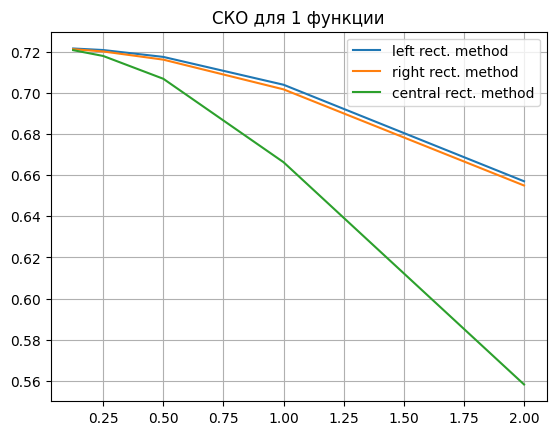

In [12]:
#График
h = [0.125, 0.25, 0.5, 1, 2]
fig, ax1 = plt.subplots()

ax1.plot(h, f1_msd_left, label="left rect. method")
ax1.plot(h, f1_msd_right, label="right rect. method")
ax1.plot(h, f1_msd_central, label="central rect. method")

ax1.set_title("СКО для 1 функции")
ax1.legend()
ax1.grid()
plt.show()

По графику видно, что СКО уменьшается с увеличением шага. Метод центральной разностной производной оказался самым точным.

Расчитаем среднеквадратичные отклонения для 2 функции

In [13]:
#Левая разностная производная
left_diff_f2_h2 = np.fromfunction(lambda x_points: left_difference_derivative(func_2, 20 / 10 / 2, x_points), (20,), dtype=float)
left_diff_f2_h4 = np.fromfunction(lambda x_points: left_difference_derivative(func_2, 20 / 10 / 4, x_points), (20,), dtype=float)
left_diff_f2_h8 = np.fromfunction(lambda x_points: left_difference_derivative(func_2, 20 / 10 / 8, x_points), (20,), dtype=float)
left_diff_f2_h16 = np.fromfunction(lambda x_points: left_difference_derivative(func_2, 20 / 10 / 16, x_points), (20,), dtype=float)

f2_msd_left = []
f2_msd_left.append(np.std([derivative_func_2(x_points), left_diff_f2_h16], axis = None))
f2_msd_left.append(np.std([derivative_func_2(x_points), left_diff_f2_h8], axis = None))
f2_msd_left.append(np.std([derivative_func_2(x_points), left_diff_f2_h4], axis = None))
f2_msd_left.append(np.std([derivative_func_2(x_points), left_diff_f2_h2], axis = None))
f2_msd_left.append(np.std([derivative_func_2(x_points), left_diff_f2], axis = None))

print("h, СКО:", f2_msd_left[4])
print("h/2, СКО:", f2_msd_left[3])
print("h/4, СКО:", f2_msd_left[2])
print("h/8, СКО:", f2_msd_left[1])
print("h/16, СКО:", f2_msd_left[0])

h, СКО: 306.82030571655457
h/2, СКО: 324.4801804425041
h/4, СКО: 333.58776019212695
h/8, СКО: 338.2121390142029
h/16, СКО: 340.5421205972602


In [14]:
#Правая разностная производная
right_diff_f2_h2 = np.fromfunction(lambda x_points: right_difference_derivative(func_2, 20 / 10 / 2, x_points), (20,), dtype=float)
right_diff_f2_h4 = np.fromfunction(lambda x_points: right_difference_derivative(func_2, 20 / 10 / 4, x_points), (20,), dtype=float)
right_diff_f2_h8 = np.fromfunction(lambda x_points: right_difference_derivative(func_2, 20 / 10 / 8, x_points), (20,), dtype=float)
right_diff_f2_h16 = np.fromfunction(lambda x_points: right_difference_derivative(func_2, 20 / 10 / 16, x_points), (20,), dtype=float)

f2_msd_right = []
f2_msd_right.append(np.std([derivative_func_2(x_points), right_diff_f2_h16], axis = None))
f2_msd_right.append(np.std([derivative_func_2(x_points), right_diff_f2_h8], axis = None))
f2_msd_right.append(np.std([derivative_func_2(x_points), right_diff_f2_h4], axis = None))
f2_msd_right.append(np.std([derivative_func_2(x_points), right_diff_f2_h2], axis = None))
f2_msd_right.append(np.std([derivative_func_2(x_points), right_diff_f2], axis = None))

print("h, СКО:", f2_msd_right[4])
print("h/2, СКО:", f2_msd_right[3])
print("h/4, СКО:", f2_msd_right[2])
print("h/8, СКО:", f2_msd_right[1])
print("h/16, СКО:", f2_msd_right[0])

h, СКО: 382.007460660129
h/2, СКО: 362.0530175264391
h/4, СКО: 352.3715812178956
h/8, СКО: 347.6037246838165
h/16, СКО: 345.23787282186527


In [15]:
#Центральная разностная производная
central_diff_f2_h2 = np.fromfunction(lambda x_points: central_difference_derivative(func_2, 20 / 10 / 2, x_points), (20,), dtype=float)
central_diff_f2_h4 = np.fromfunction(lambda x_points: central_difference_derivative(func_2, 20 / 10 / 4, x_points), (20,), dtype=float)
central_diff_f2_h8 = np.fromfunction(lambda x_points: central_difference_derivative(func_2, 20 / 10 / 8, x_points), (20,), dtype=float)
central_diff_f2_h16 = np.fromfunction(lambda x_points: central_difference_derivative(func_2, 20 / 10 / 16, x_points), (20,), dtype=float)

f2_msd_central = []
f2_msd_central.append(np.std([derivative_func_2(x_points), central_diff_f2_h16], axis = None))
f2_msd_central.append(np.std([derivative_func_2(x_points), central_diff_f2_h8], axis = None))
f2_msd_central.append(np.std([derivative_func_2(x_points), central_diff_f2_h4], axis = None))
f2_msd_central.append(np.std([derivative_func_2(x_points), central_diff_f2_h2], axis = None))
f2_msd_central.append(np.std([derivative_func_2(x_points), central_diff_f2], axis = None))

print("h, СКО:", f2_msd_central[4])
print("h/2, СКО:", f2_msd_central[3])
print("h/4, СКО:", f2_msd_central[2])
print("h/8, СКО:", f2_msd_central[1])
print("h/16, СКО:", f2_msd_central[0])

h, СКО: 343.9672222756116
h/2, СКО: 343.1540470401012
h/4, СКО: 342.95147707073664
h/8, СКО: 342.9008799588629
h/16, СКО: 342.8882335193717


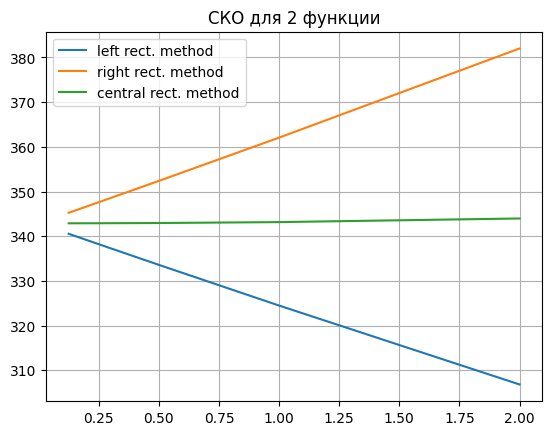

In [16]:
#График
h = [0.125, 0.25, 0.5, 1, 2]
fig, ax1 = plt.subplots()

ax1.plot(h, f2_msd_left, label="left rect. method")
ax1.plot(h, f2_msd_right, label="right rect. method")
ax1.plot(h, f2_msd_central, label="central rect. method")

ax1.set_title("СКО для 2 функции")
ax1.legend()
ax1.grid()
plt.show()

По графику видно, что при использовании метода правой разностной производной СКО увеличиваетися с увеличением шага. С методом левой разностной производной - уменьшается. Метод центральной разностной производной оказался самым устойчивым, левый - точным.


## 5. Реализуйте методы численного интегрирования.

### Квадратурные методы численного интегрирования
$$
  I = \int^b_af(x)dxl ≃ \sum^n_0A_if(\bar x_i)
$$
$$
где\ \bar x_i - некоторые\ точки\ из\ отрезка\ [a,\ b].
$$

На вычисляемом отрезке интеграла делим его сеткой узлов:
$$
a=x_0<x_1<...<x_n=b
$$
Интеграл - сумма элементарных интегралов - криволинейных трапеций, разбитых сеткой на отрезки $[x_{i-1},x_i]$ $I=\sum^n_1I_i$. Метод интегрирования зависит от способа вычисления площади этих трапеций.


*   Формула прямоугольников \
    Приближаем трапецию площадью прямоугольников. Причем в зависимости от той точки, которая определяет высоту прямоугольника можно получить метод:
    * Левых прямоугольников $I_i \simeq h f_{i-1}$
    * Правых прямоугольников $I_i \simeq h f_i$
    * Средних прямоугольников $I_i \simeq h f_{i-1/2}$
*   Формула трапеций \
    Используя оба конца отрезка элементарной криволинейной
трапеции, приближаем ее площадь как площадь трапеции
$$
I_i \simeq \frac{h}{2} (f_{i-1}+f_i)
$$
*   Формула Симпсона \
    Приближаем трапецию параболой, проходящей через точки $x_{i-1},\ x_{i-1/2}\ и\ x_i$
$$
I_i = \frac{h}{6} (f_{i-1}+4f_{i-1/2}+f_i)
$$

$$
\int^b_af(x)dx = \frac{h}{3}(y_0 + 4y_1 + 2y_2 + ... + 2y_{n-2} + 4y_{n-1} + y_n)
$$
  Для использования этого метода необходимо минимум три узла и их количество должно быть нечётным.


Реализуем методы численного интегрирования:

In [17]:
# Формула левых прямоугольников
def left_rectangle_rule(func, a, b, step):
  result = 0.0
  current_x = a

  while (current_x < b):
    result += func(current_x)
    current_x += step

  return result * step

# Формула правых прямоугольников
def right_rectangle_rule(func, a, b, step):
  result = 0.0
  current_x = a + step
  while (current_x < b):
    result += func(current_x)
    current_x += step

  return result * step

# Формула средних прямоугольников
def middle_rectangle_rule(func, a, b, step):
  result = 0.0
  current_x = a + (step / 2)
  steps_count = int((b - a) // step)

  for i in range(steps_count):
    result += func(current_x)
    current_x += step

  return result * step

# Формула трапеций
def trapezoidal_rule(func, a, b, step):
  result = 0.0
  trailing_x = a
  leading_x = a + step

  while (a <= leading_x <= b) or (a >= leading_x >= b):
    segment_area = (func(trailing_x) + func(leading_x)) * step / 2
    result += segment_area

    leading_x += step
    trailing_x += step

  return result

# Правило Симпсона
def simpson_rule(func, a, b, step): 
  result = func(a) + func(b)
  steps_count = int((b - a) // step)
  current_x = a
  
  for i in range(1, steps_count):
    current_x += step
    result += 2 * func(current_x) if i % 2 == 0 else 4 * func(current_x)
  
  return result * step / 3

## 6. Выберите 2 функции и вычислите для них определенный интеграл на отрезке. Сравните полученное значение с ответом, полученным аналитически


Введем следующие функции:

f1(x)=cos(x*10)-5,x∈[5,10]

f2(x)=sin(x)⋅cos(2x)-5,x∈[5,10]

будем рассматривать их на отрезке x∈[5,10]

In [18]:
def f1(x):
    return np.sin(x * 10) - 5

def f2(x):
    return np.sin(x) * np.cos(2*x) - 5


a, b = 5, 10
step = 1
argx = np.linspace(a, b, int((b - a) / step) + 1)

Считаем аналитическое значение, рассчитываем интегралы по нашим методам

In [19]:
sums_first = [["absolute sums", (np.cos(a * 10) - np.cos(b * 10)) / 10 - b * 5 + 5 * a],
              ["middle sums", middle_rectangle_rule(f1, a, b, step)],
              ["trapezoid sums", trapezoidal_rule(f1, a, b, step)],
              ["parabolic sums", simpson_rule(f1, a, b, step)]]

sums_second = [["absolute sums", (np.sin(2*a) - np.sin(2*b)) / 2 - (np.sin(a) - np.sin(b)) / 2 + (a - b) * 5],
              ["middle sums", middle_rectangle_rule(f2, a, b, step)],
              ["trapezoid sums", trapezoidal_rule(f2, a, b, step)],
              ["parabolic sums", simpson_rule(f2, a, b, step)]]

print(f"first function:", *[f"{it[0]}: {it[1]}" for it in sums_first], sep="\n")
print(f"second function:", *[f"{it[0]}: {it[1]}" for it in sums_second], sep="\n")

first function:
absolute sums: -24.989735284379556
middle sums: -25.053522034490413
trapezoid sums: -25.01518217727399
parabolic sums: -24.20925430153305
second function:
absolute sums: -25.521031598921613
middle sums: -25.81451645136425
trapezoid sums: -25.52999053670718
parabolic sums: -24.47549647687237


Выводим график

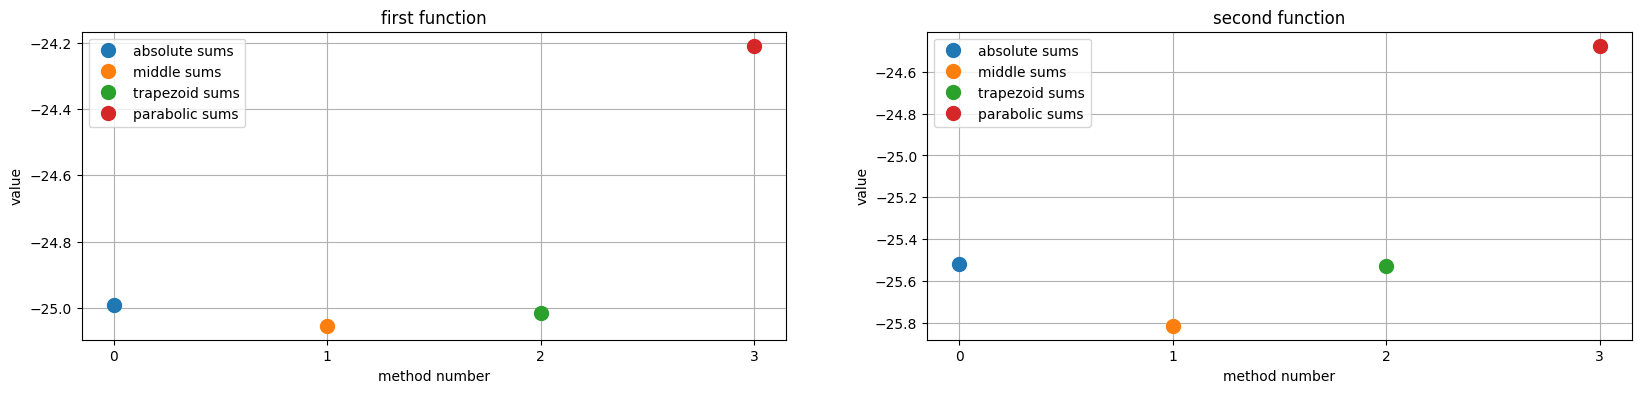

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
for i in range(len(sums_first)):
    ax[0].plot(i, sums_first[i][1], 'o', label=sums_first[i][0], markersize=10)
ax[0].grid()
ax[0].legend()
ax[0].set(xticks=np.arange(0, len(sums_first)), xlabel="method number", ylabel="value", title="first function")

for i in range(len(sums_second)):
    ax[1].plot(i, sums_second[i][1], 'o', label=sums_second[i][0], markersize=10)
ax[1].grid()
ax[1].legend()
ax[1].set(xticks=np.arange(0, len(sums_second)), xlabel="method number", ylabel="value", title="second function")
plt.show()

## 7. Проанализируйте зависимость отклонения численного ответа от аналитического в зависимости от шага при уменьшении его в 2, 4, 8 и 16 раз. Постройте график зависимости отклонения от величины шага.

Вычисляем значения отклонений через отдельную функцию

In [21]:
step = 0.5
def calculate_errors(f, a, b, step, value):
    analytical = value
    middle_errors = []
    trapezoidal_errors = []
    simpson_errors = []
    for i in [step, step/2, step/4, step/8]:
        middle_errors.append(abs(middle_rectangle_rule(f, a, b, i) - analytical))
        trapezoidal_errors.append(abs(trapezoidal_rule(f, a, b, i) - analytical))
        simpson_errors.append(abs(simpson_rule(f, a, b, i) - analytical))
    return middle_errors, trapezoidal_errors, simpson_errors

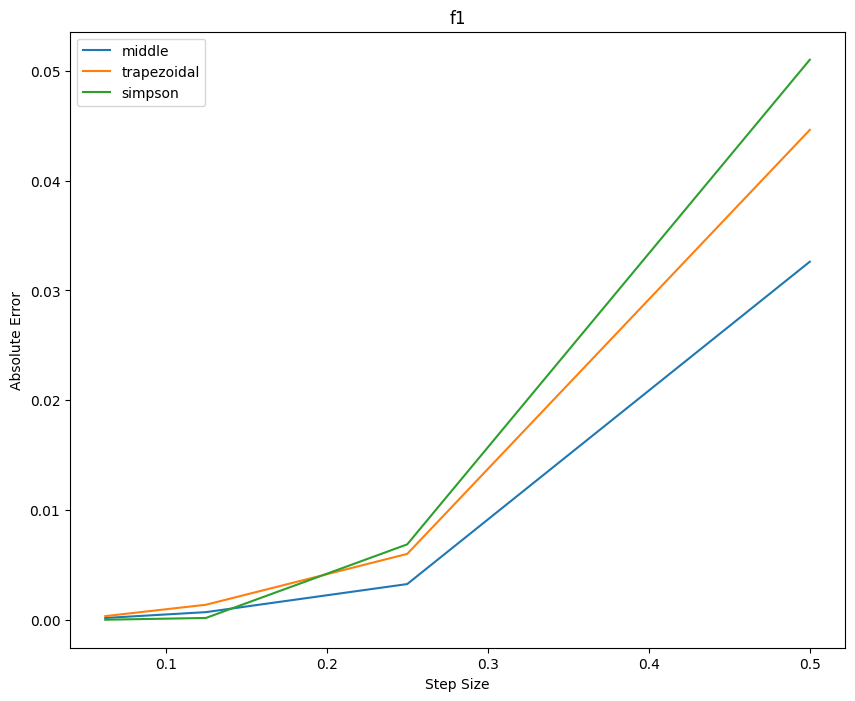

In [22]:
f1_middle_errors, f1_trapezoidal_errors, f1_simpson_errors = calculate_errors(f1, a, b, step, (np.cos(a * 10) - np.cos(b * 10)) / 10 - b * 5 + 5 * a)
f2_middle_errors, f2_trapezoidal_errors, f2_simpson_errors = calculate_errors(f2, a, b, step, (np.sin(2*a) - np.sin(2*b)) / 2 - (np.sin(a) - np.sin(b)) / 2 + (a - b) * 5)

plt.figure(figsize=(10,8))
plt.title("f1")
plt.plot([step, step/2, step/4, step/8], f1_middle_errors, label="middle")
plt.plot([step, step/2, step/4, step/8], f1_trapezoidal_errors, label="trapezoidal")
plt.plot([step, step/2, step/4, step/8], f1_simpson_errors, label="simpson")
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel("Step Size")
plt.ylabel("Absolute Error")
plt.legend()
plt.show()

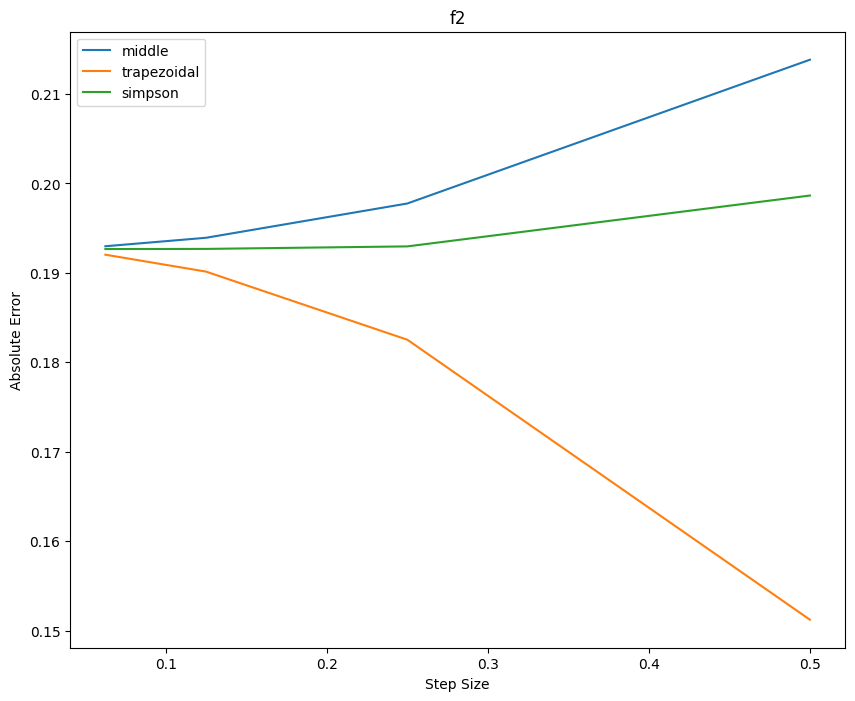

In [23]:
plt.figure(figsize=(10,8))
plt.title("f2")
plt.plot([step, step/2, step/4, step/8], f2_middle_errors, label="middle")
plt.plot([step, step/2, step/4, step/8], f2_trapezoidal_errors, label="trapezoidal")
plt.plot([step, step/2, step/4, step/8], f2_simpson_errors, label="simpson")
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel("Step Size")
plt.ylabel("Absolute Error")
plt.legend()
plt.show()